ChEn-5310: Computational Continuum Transport Phenomena Spring 2021 UMass Lowell; Prof. V. F. de Almeida **17Feb21**

# 05. Poisson 1D w/ MOOSE
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

---

## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
* [Problem Statement](#statement)
* [Collocation Points](#colpts)
* [Lagrange Polynomial Basis Functions w/ Least-Squares Residual](#lagrange-lsq)
  - [Linear Combination of Non-Linear Basis Functions](#lagrange-lincomb)
  - [Optimal Combination Coefficients](#lagrange-optimal-coeff)
  - [Best Approximant Function](#lagrange-approximant)
  - [Results](#lagrange-res)
  - [Errors](#lagrange-error)
  - [Residual](#lagrange-residual)
* [Experiment #1](#ex1)
---

## [Objectives](#toc)<a id="obj"></a>

 + Begin using MOOSE to practice solving ODE's.

## [Poisson 1D Problem Statement](#toc)<a id="statem"></a>

Solve the Poisson model problem. Find $u:[a,b]\in\Reals\rightarrow\Reals$ for $D \ne 0$ such that:

\begin{align*}
 \bigl(D(x)\, u'\bigr)'(x) + S(x) &= 0 \quad \forall \quad x\in [a,b], \\
 u(a) &= A, \\
 u(b) &= B.
\end{align*}
   
Solve this problem analytically for constant diffusion coefficient, $D$, and source, $S$.

## [MOOSE Components](#toc)<a id="moose"></a>

We need to create a MOOSE *application* with two MOOSE *kernels* and an *input* file.

### MOOSE App Creation

1. `cd ~/moose`
1. `cd ..`
1. `./moose/scripts/stork.sh Engy5310P1`
1. Disregard the `github` setup
1. `cd engy5310p1`
1. `make`
1. `./run_tests`
1. `cp test/tests/kernels/simple_diffusion/simple_diffusion.i input.i`
1. Cleanup: `delete test/, unit/, doc/, scripts/, and run_tests`
1. Edit `src/main.C`
 - Replace `Engy5310P1TestApp` with `Engy5310P1App`
1. `make clean`
1. `make`
1. Test run 
 + `./engy5310-opt -i input.i`
1. Use VisIt or Paraview to visualize test_out.e

### Add Diffusion Term Kernel
1. `cd include`
1. `mkdir kernel`
1. Create a `DiffsionTerm.h` class interface.
 + See notes here later.
1. Create a `DiffusionTerm.C` class implementation.
 + See notes here later.

### Add Source Term Kernel
1. `cd include`
1. `mkdir kernel`
1. Create a `SourceTerm.h` class interface.
  + See notes here later.
1. Create a `SourceTerm.C` class implementation.
  + Seen notes here later.

In [3]:
'''FEM Solution'''

x_a = -10.0
x_b = 11.0
u_a = 0
u_b = 1

diff_coeff = 5.0
source_s = 0.2

n_felem = 8
order = 'second'
n_plot_pts = 5

from engy_5310.toolkit import run_engy5310_p1

run_engy5310_p1(x_a, x_b, u_a, u_b, diff_coeff, source_s, n_felem, order, n_plot_pts)

returned value: 0
returned value: 256


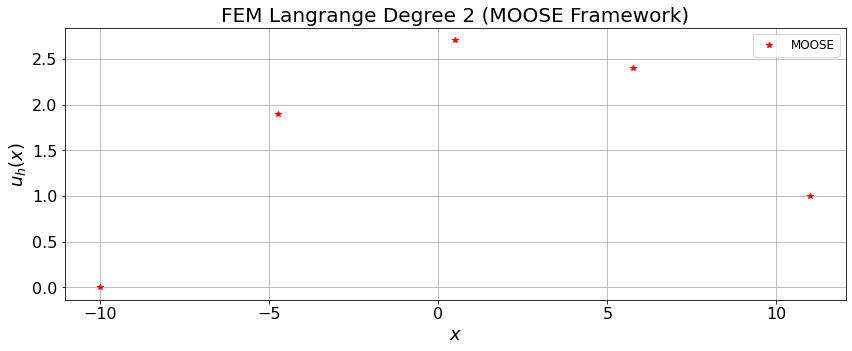

In [2]:
'''Show FEM Solution'''

import pandas as pd

df = pd.read_csv('engy5310p1/output_u_0002.csv')
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(14, 5))
plt.plot(df['x'], df['u'],'r*',label='MOOSE')
plt.title('FEM Langrange Degree 2 (MOOSE Framework)', fontsize=20)
plt.ylabel(r'$u_h(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

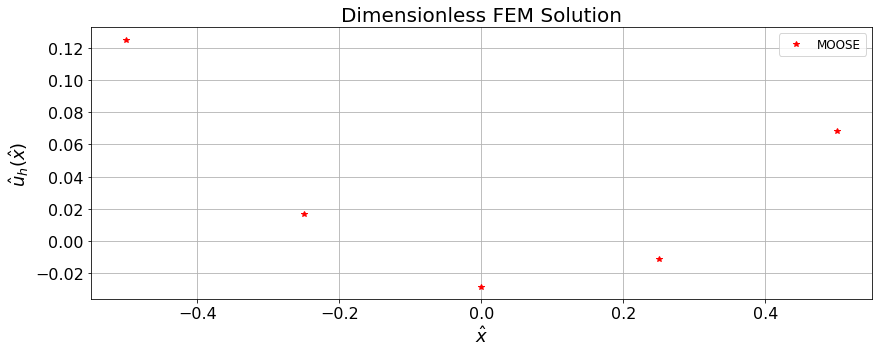

In [4]:
'''Dimensionless solution'''

L = df['x'].max() - df['x'].min()
x_hat = (df['x'] - df['x'].min())/L - 0.5

c = - source_s / diff_coeff
u_hat = df['u']/c/L**2 + 1/8

plt.figure(1, figsize=(14, 5))
plt.plot(x_hat, u_hat,'r*',label='MOOSE')
plt.title('Dimensionless FEM Solution', fontsize=20)
plt.ylabel(r'$\hat{u}_h(\hat{x})$', fontsize=18)
plt.xlabel(r'$\hat{x}$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()